In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [5]:
#read CSV file
df = pd.read_csv('new_data.csv')
df.head()

,Unnamed: 0,cap-diameter,stem-height,stem-width,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0,15.26,16.95,17.09,1,6,2,6,0,2,3,10,7,11,1,2,0,3
1,1,16.60,17.99,18.19,1,6,2,6,0,2,3,10,7,11,1,2,0,2
2,2,14.07,17.80,17.74,1,6,2,6,0,2,3,10,7,11,1,2,0,3
3,3,14.17,15.77,15.98,1,2,3,1,0,2,3,10,7,11,1,5,0,3
4,4,14.64,16.53,17.20,1,6,3,6,0,2,3,10,7,11,1,5,0,3


In [6]:
df=df.drop(['Unnamed: 0'], axis=1 )
df.head()

,cap-diameter,stem-height,stem-width,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,15.26,16.95,17.09,1,6,2,6,0,2,3,10,7,11,1,2,0,3
1,16.60,17.99,18.19,1,6,2,6,0,2,3,10,7,11,1,2,0,2
2,14.07,17.80,17.74,1,6,2,6,0,2,3,10,7,11,1,2,0,3
3,14.17,15.77,15.98,1,2,3,1,0,2,3,10,7,11,1,5,0,3
4,14.64,16.53,17.20,1,6,3,6,0,2,3,10,7,11,1,5,0,3


In [52]:
# create a helper function for plotting feature(s) vs target variable 

def plot_features(df,sample_size=500):
    
    sample = (df.sample(1000, random_state=44)) 
    sns.pairplot(sample,hue='class', plot_kws=dict(alpha=.3, edgecolor='none'))

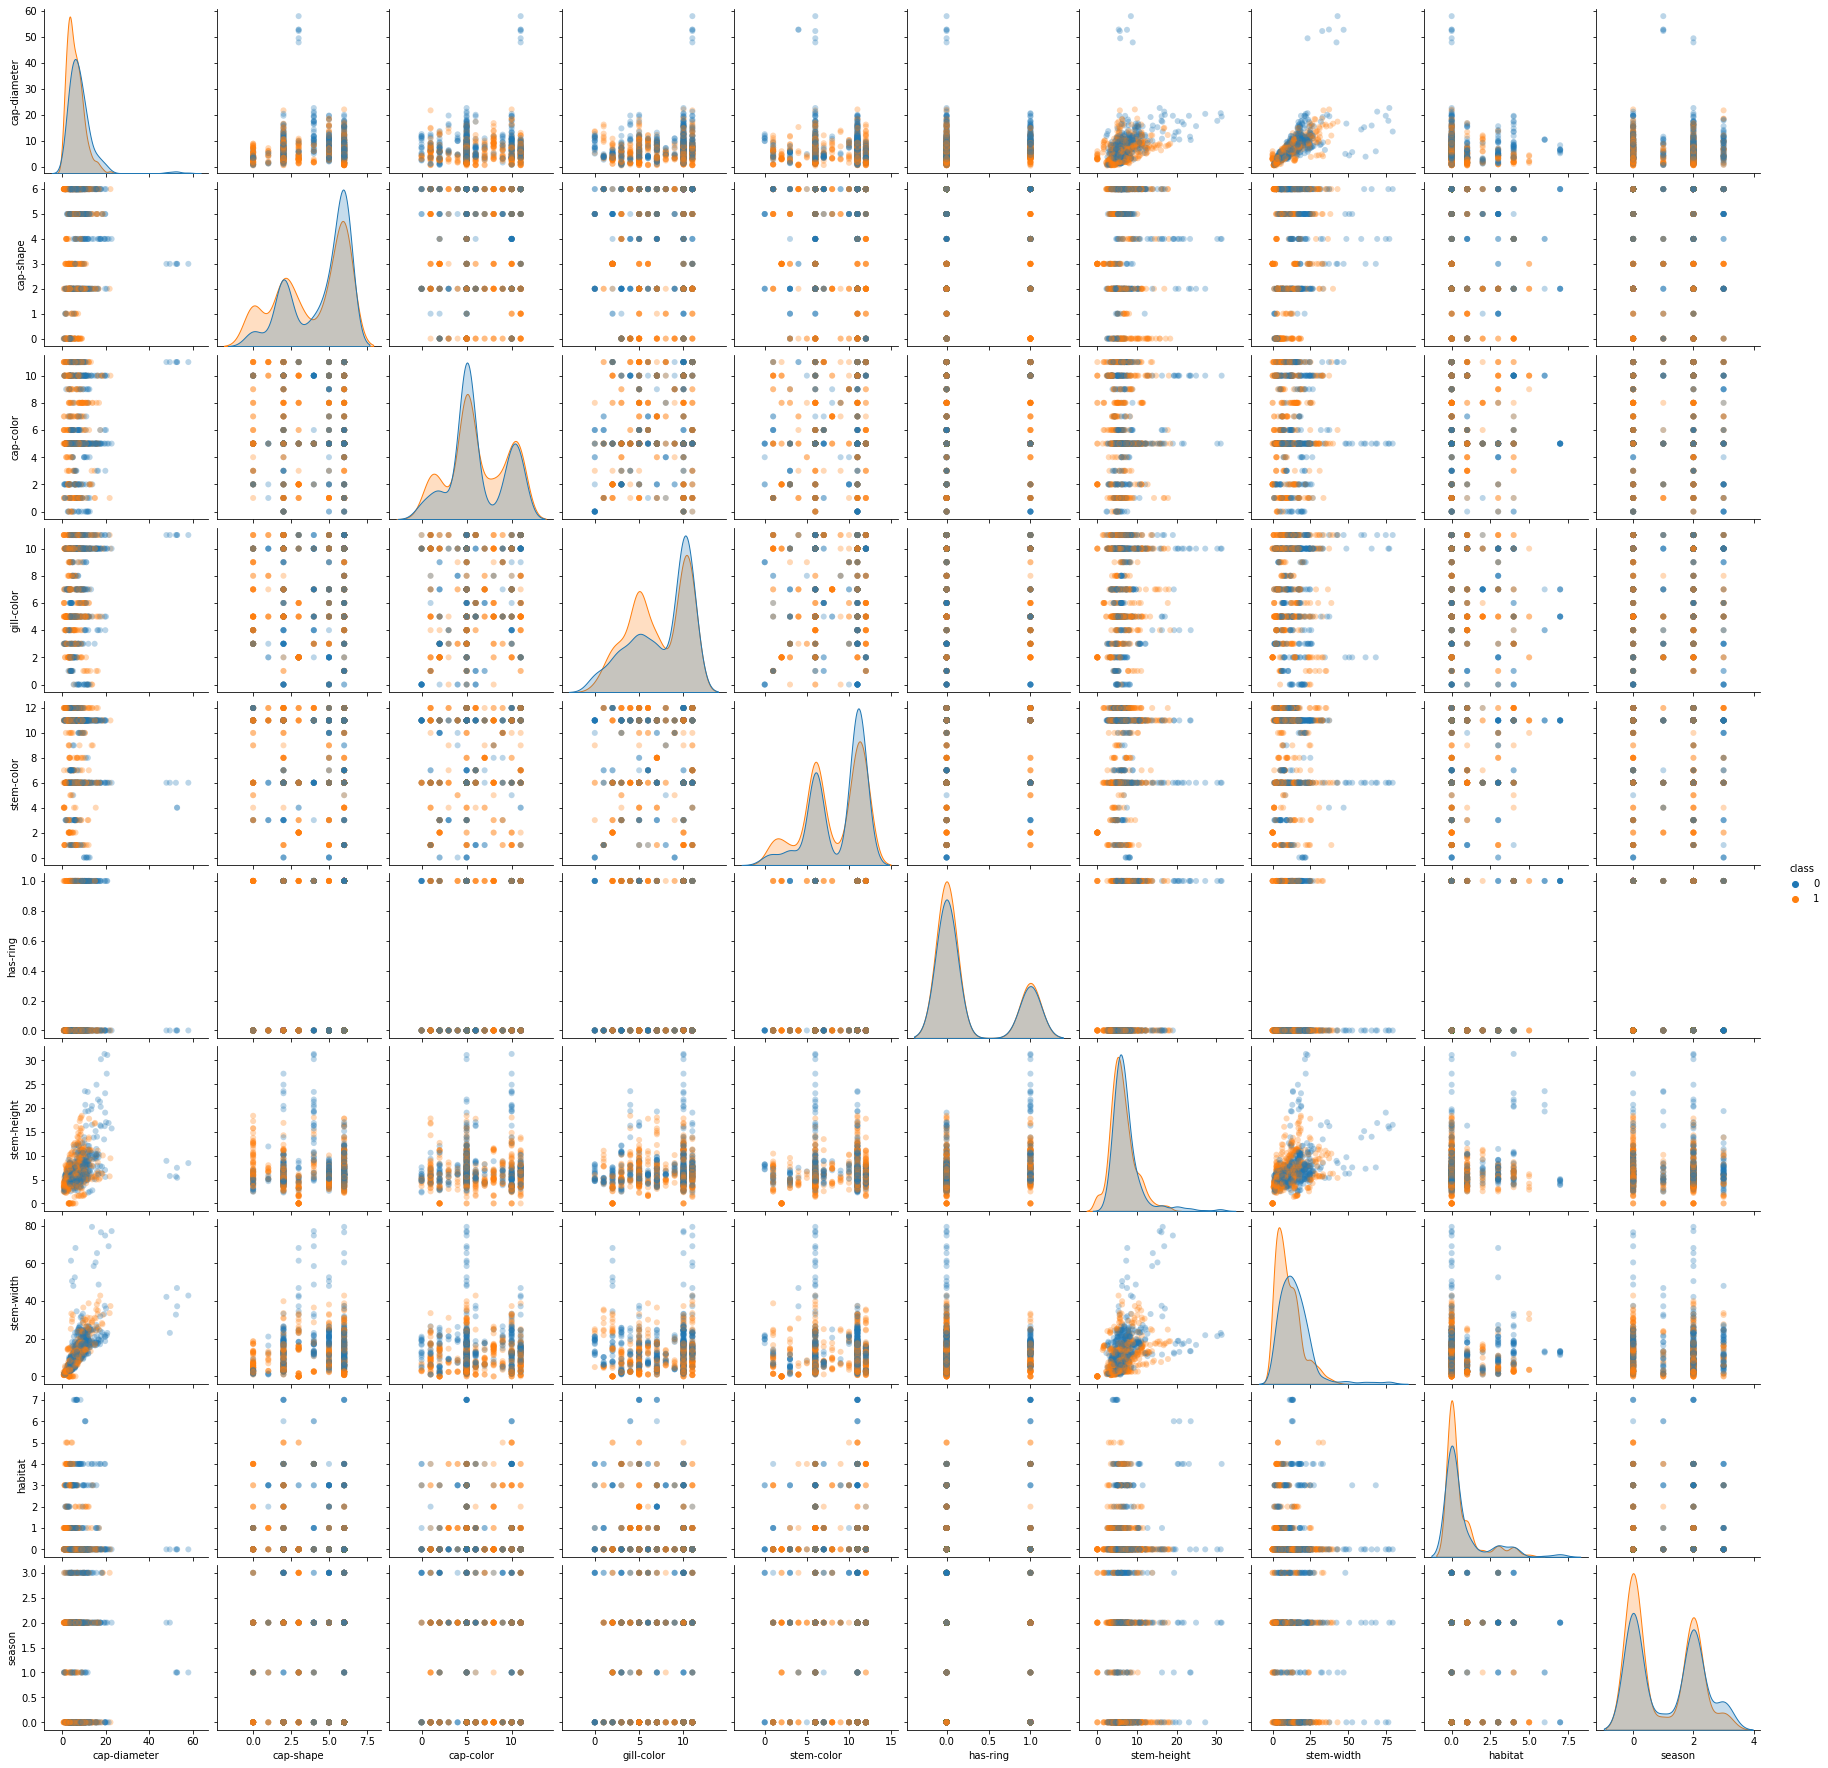

In [59]:
plot_features(df[['class', 'cap-diameter','cap-shape','cap-color', 'gill-color', 
                   'stem-color','has-ring', 'stem-height', 'stem-width', 'habitat', 'season']]
             )

In [7]:
from sklearn.model_selection import train_test_split
#TRAIN_TEST_SPLIT (80/20)

#CREATE TRAIN/VALIDATION/TEST SETS

#set X and y as datasets

X = df.loc[:,['cap-diameter','cap-shape','cap-color', 'gill-color', 'stem-color','has-ring',
              'stem-height', 'stem-width', 'habitat', 'season']]
y = df['class']

#Split data into two sections: Train+Val, Testing


X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [8]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, fbeta_score
from sklearn.metrics import confusion_matrix, roc_curve
import sklearn.metrics as metrics

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [77]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 10, max_features = 3, n_jobs=-1)
rf_classifier.fit(X_train, y_train)
print(' Random Forest Classifier train score:',rf_classifier.score(X_train, y_train))

rf_y_pred_val = rf_classifier.predict(X_val)

print(' Random Forest Classifier  validation metrics: \n Accuracy: %.4f \n Recall: %.4f \n fbeta_score: %.4f' %
          (metrics.accuracy_score(y_val , rf_y_pred_val),
           metrics.recall_score(y_val, rf_y_pred_val),
          metrics.fbeta_score(y_val, rf_y_pred_val, beta=0.7))
     )

 Random Forest Classifier train score: 0.9991812450533555
 Random Forest Classifier  validation metrics: 
 Accuracy: 0.9863 
 Recall: 0.9853 
 fbeta_score: 0.9883


In [74]:
#Confusion metrix for train set
#cm_rf_train = confusion_matrix(y_train , rf_classifier.predict(X_train))
#print(cm_rf_train)

[[16340     3]
 [   23 20275]]


In [68]:
# confusion metrix for validation set
cm_rf_val = confusion_matrix(y_val , rf_y_pred_val)
print(cm_rf_val)

[[5423   66]
 [  91 6634]]


<AxesSubplot:>

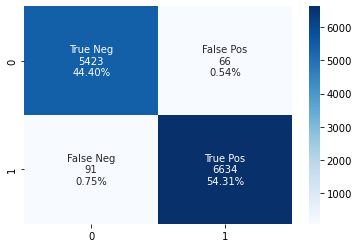

In [69]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_rf_val.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_rf_val.flatten()/np.sum(cm_rf_val)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rf_val, annot=labels, fmt='', cmap='Blues')

# Random forest model on test dataset

In [78]:
# random forest model on test set
rf_y_pred_test = rf_classifier.predict(X_test)

print(' Random Forest Classifier validation metrics: \n Accuracy: %.4f \n Recall: %.4f \n fbeta_score: %.4f' %
          (metrics.accuracy_score(y_test , rf_y_pred_test),
           metrics.recall_score(y_test, rf_y_pred_test),
          metrics.fbeta_score(y_test, rf_y_pred_test, beta=0.7))
     )

 Random Forest Classifier validation metrics: 
 Accuracy: 0.9875 
 Recall: 0.9837 
 fbeta_score: 0.9906


In [71]:
# confusion metrix for test set
cm_rf_test = confusion_matrix(y_test , rf_y_pred_test)
print(cm_rf_test)

[[5302   47]
 [  93 6772]]


<AxesSubplot:>

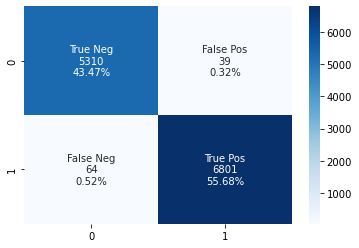

In [30]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_rf_test.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_rf_test.flatten()/np.sum(cm_rf_test)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rf_test, annot=labels, fmt='', cmap='Blues')

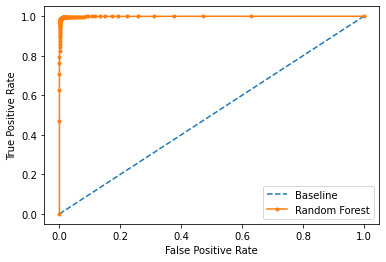

In [61]:
# calculate roc curves for random forest
fpr, tpr, thresholds = roc_curve(y_test , rf_classifier.predict_proba(X_test)[:,1])

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='Baseline')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

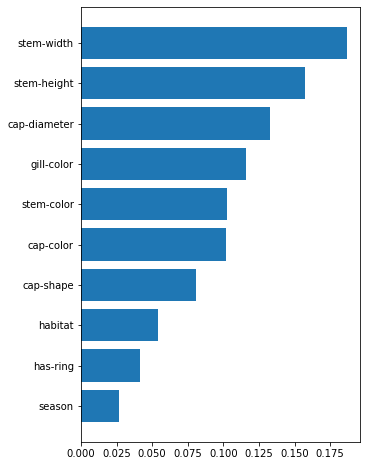

In [80]:
# Plotting the calculated feature importances by RF model

importance_df = pd.DataFrame(data=zip(X.columns, rf_classifier.feature_importances_))
importance_df.sort_values(by=[1], inplace=True)
plt.figure(figsize=(5, 8))
plt.barh(importance_df[0], importance_df[1])
plt.savefig("Featureimportance.png", bbox_inches='tight', dpi=600)

In [57]:
rf_feature_importance = pd.DataFrame({'feature': X.columns,
                   'importance': rf_classifier.feature_importances_}).\
                    sort_values('importance', ascending = False)
rf_feature_importance.head(10)

,feature,importance
7,stem-width,0.191543
6,stem-height,0.146791
0,cap-diameter,0.122743
2,cap-color,0.112935
4,stem-color,0.112659
3,gill-color,0.109789
1,cap-shape,0.083878
8,habitat,0.053255
5,has-ring,0.040214
9,season,0.026193
